In [2]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [3]:
from psikit import Psikit

In [4]:
pk=Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [5]:
pk.read_from_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

In [6]:
pk.optimize()

Optimizer: Optimization complete!


-676.3571175868374

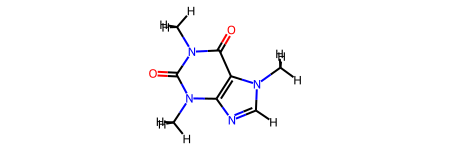

In [7]:
pk.mol

In [8]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20126129  0.07053647  0.08505922 -0.47140631  0.12577527 -0.10083399
  0.36409503 -0.496009   -0.04595434  0.36252509 -0.52858764  0.02500893
  0.00605449 -0.03375539  0.11036585  0.11036585  0.11036585  0.17305157
  0.05004287  0.05004287  0.05004287  0.06149192  0.06149192  0.06149192]
[-0.11403957 -0.69387159  0.3864094  -0.62283946  0.63497402  0.09325892
  0.89978887 -0.63014346 -0.87904362  1.09566898 -0.6272436  -0.87749708
 -0.12040863 -0.12349389  0.12973196  0.16727753  0.16726885  0.18241273
  0.16750548  0.14895385  0.14892479  0.14560134  0.14560935  0.17519482]
[-0.13210087 -0.05233688  0.07734797 -0.27543923  0.13961183 -0.1254988
  0.29394265 -0.39450008 -0.18830338  0.34847997 -0.39857863 -0.15250966
 -0.13202203 -0.13825372  0.10404908  0.11675935  0.11778372  0.12133836
  0.11931928  0.1084129   0.10770444  0.10710539  0.10597677  0.12171157]


In [9]:
mol = pk.mol
atoms = mol.GetAtoms()

In [10]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [11]:
df = pd.DataFrame(data)

In [12]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.201,-0.114,-0.132
1,N,0.071,-0.694,-0.052
2,C,0.085,0.386,0.077
3,N,-0.471,-0.623,-0.275
4,C,0.126,0.635,0.140
5,C,-0.101,0.093,-0.125
6,C,0.364,0.900,0.294
7,O,-0.496,-0.630,-0.395
8,N,-0.046,-0.879,-0.188
9,C,0.363,1.096,0.348


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
plt.style.use('ggplot')

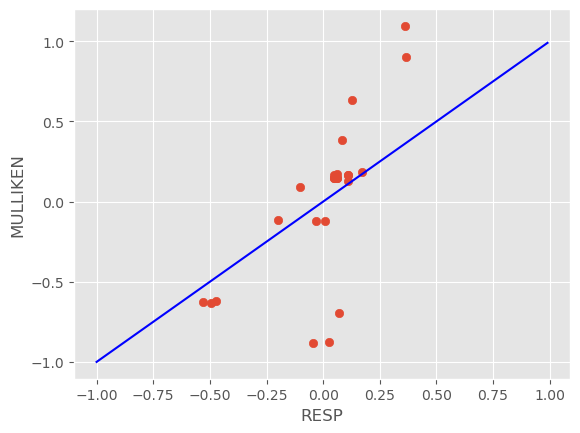

In [15]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

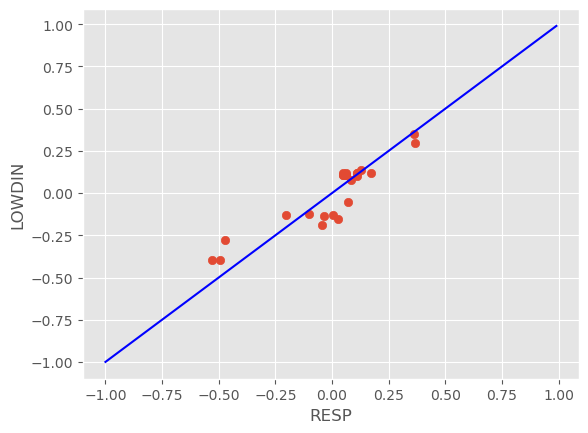

In [16]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

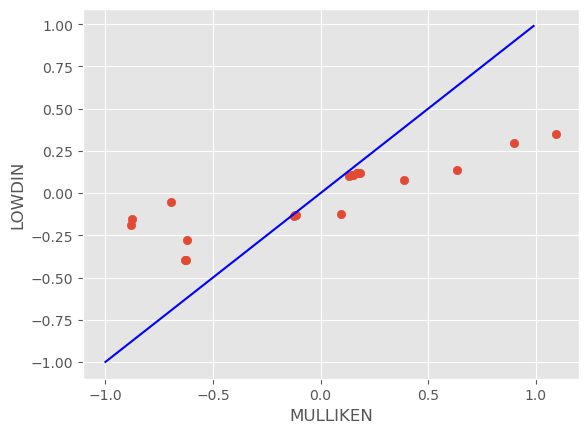

In [17]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

In [ ]:
# Calculate RESP charges
resp_charges = pk.esp_charges  # Use ESP charges if RESP is not available directly

# Assign RESP charges as atom labels
for i, atom in enumerate(pk.mol.GetAtoms()):
    atom.SetProp("RESP Charge", f"{resp_charges[i]:.3f}")

# Draw molecule with RESP charges as labels
def draw_molecule_with_charges(mol, charge_label="RESP Charge"):
    drawer = rdMolDraw2D.MolDraw2DSVG(500, 300)
    drawer.drawOptions().addAtomIndices = True
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace("svg:", "")
    return SVG(svg)

# Display the molecule with labeled RESP charges
display(draw_molecule_with_charges(pk.mol))